In [1]:
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import array
import time
import pylab as pl
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas_datareader.data as web

In [2]:
%matplotlib inline

In [3]:
tweet_file1 = [r'C:\Users\Shrekar\Documents\PYTHON\data mining project\Trumpdate.json']
tweet1 = []
for file in tweet_file1:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweet1.append(json.loads(line))
tweetdata1 = pd.DataFrame(tweet1)
tweetdata1


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'Be...",NaN,0,False,None,853035136379736064,853035136379736064,...,NaN,NaN,NaN,6458,False,"{'is_quote_status': False, 'created_at': 'Fri ...","<a href=""http://twitter.com/download/iphone"" r...",RT @SenSanders: A lot of working people voted ...,False,"{'profile_background_color': 'C0DEED', 'profil..."
1,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'Sc...",NaN,0,False,None,853035136060977152,853035136060977152,...,NaN,NaN,NaN,331,False,"{'is_quote_status': False, 'created_at': 'Fri ...","<a href=""http://twitter.com/download/iphone"" r...",RT @funder: Report says Trump Adviser JD Gordo...,False,"{'profile_background_color': 'C0DEED', 'profil..."
2,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'Ca...",NaN,0,False,None,853035135926665216,853035135926665216,...,NaN,NaN,NaN,2113,False,"{'is_quote_status': False, 'created_at': 'Fri ...","<a href=""http://twitter.com/download/iphone"" r...",RT @RVAwonk: Trump won't let you view the WH v...,False,"{'profile_background_color': 'C0DEED', 'profil..."
3,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'Te...",NaN,0,False,None,853035135918383104,853035135918383104,...,NaN,NaN,NaN,5868,False,"{'is_quote_status': False, 'created_at': 'Thu ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @tedlieu: Dear @POTUS: Here's a tip. Get a ...,False,"{'profile_background_color': '000000', 'profil..."
4,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'MA...",NaN,0,False,None,853035135565840384,853035135565840384,...,NaN,3.737435e+17,373743492151136256,4,False,"{'is_quote_status': True, 'created_at': 'Thu A...","<a href=""http://twitter.com/download/iphone"" r...",RT @Uslopp: Retweeting again so you Trump-hump...,False,"{'profile_background_color': 'C0DEED', 'profil..."
5,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'Da...",NaN,0,False,None,853035135532503040,853035135532503040,...,NaN,NaN,NaN,13517,False,"{'is_quote_status': False, 'created_at': 'Thu ...","<a href=""http://twitter.com/download/iphone"" r...",RT @DannyZuker: BREAKING: Trump drops entire b...,False,"{'profile_background_color': 'C0DEED', 'profil..."
6,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,0,False,None,853035135146524672,853035135146524672,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",Democrats In Illinois Just Unseated A Whole Bu...,False,"{'profile_background_color': 'C0DEED', 'profil..."
7,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'Ke...",NaN,0,False,None,853035135138230272,853035135138230272,...,NaN,NaN,NaN,146,False,"{'is_quote_status': False, 'created_at': 'Fri ...","<a href=""http://twitter.com/#!/download/ipad"" ...","RT @KwikWarren: Hi FBI, could y'all please ind...",False,"{'profile_background_color': 'B9D8DE', 'profil..."
8,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'Ad...",NaN,0,False,None,853035135029174272,853035135029174272,...,NaN,8.229914e+17,822991354888212480,114,False,"{'is_quote_status': True, 'created_at': 'Fri A...","<a href=""http://twitter.com/download/iphone"" r...",RT @Khanoisseur: @GStephanopoulos 4. Overlooke...,False,"{'profile_background_color': '0099B9', 'profil..."
9,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'symbols': [], 'user_mentions': [{'name': 'po...",NaN,0,False,None,853035134894866432,853035134894866432,...,NaN,NaN,NaN,6,False,"{'is_quote_status': False, 'created_at': 'Fri ...","<a href=""http://twitter.com"" 

In [4]:
tweetdata1['text']

0       RT @SenSanders: A lot of working people voted ...
1       RT @funder: Report says Trump Adviser JD Gordo...
2       RT @RVAwonk: Trump won't let you view the WH v...
3       RT @tedlieu: Dear @POTUS: Here's a tip. Get a ...
4       RT @Uslopp: Retweeting again so you Trump-hump...
5       RT @DannyZuker: BREAKING: Trump drops entire b...
6       Democrats In Illinois Just Unseated A Whole Bu...
7       RT @KwikWarren: Hi FBI, could y'all please ind...
8       RT @Khanoisseur: @GStephanopoulos 4. Overlooke...
9       RT @Poelstoot18: Trump vaagt N.Korea binnenkor...
10      RT @TheLastWord: Joe Biden condemns LGBTQ cris...
11      Trump delights in watching the U.S. military d...
12      RT @KentuckyBlacc: Every General wanted JFK to...
13      RT @AP: Pentagon officials say US commander in...
14      RT @molly_knight: If the people investigating ...
15      RT @GhostPanther: Just want to give an extra s...
16      RT @MAMABEAR1219: Source: foreign intel gives ...
17      RT @Ra

In [5]:
tweetdata = pd.DataFrame()
tweetdata['created_at'] = tweetdata1['created_at']
tweetdata['favorite_count'] = tweetdata1['favorite_count']
tweetdata['retweet_count'] = tweetdata1['retweet_count']
tweetdata['text'] = tweetdata1['text']
tweetdata['text'] = tweetdata['text'].map(lambda y: re.sub(r'RT', ' ', y)) 
tweetdata['text'] = tweetdata['text'].map(lambda x: re.sub(r'\W+', ' ', x))
tweetdata

,created_at,favorite_count,retweet_count,text
0,Fri Apr 14 23:59:59 +0000 2017,0,6458,SenSanders A lot of working people voted for ...
1,Fri Apr 14 23:59:59 +0000 2017,0,331,funder Report says Trump Adviser JD Gordon we...
2,Fri Apr 14 23:59:59 +0000 2017,0,2113,RVAwonk Trump won t let you view the WH visit...
3,Fri Apr 14 23:59:59 +0000 2017,0,5868,tedlieu Dear POTUS Here s a tip Get a briefin...
4,Fri Apr 14 23:59:59 +0000 2017,0,4,Uslopp Retweeting again so you Trump humpers ...
5,Fri Apr 14 23:59:59 +0000 2017,0,13517,DannyZuker BREAKING Trump drops entire budget...
6,Fri Apr 14 23:59:59 +0000 2017,0,0,Democrats In Illinois Just Unseated A Whole Bu...
7,Fri Apr 14 23:59:59 +0000 2017,0,146,KwikWarren Hi FBI could y all please indict c...
8,Fri Apr 14 23:59:59 +0000 2017,0,114,Khanoisseur GStephanopoulos 4 Overlooked Page...
9,Fri Apr 14 23:59:59 +0000 2017,0,6,Poelstoot18 Trump vaagt N Korea binnenkort we...


In [6]:
tweetdata.to_csv(r'c:\Users\Shrekar\Documents\PYTHON\data mining project\tweetdataclean.txt', header=None, index=None, sep=' ', mode='a')

In [7]:
tweetdata.describe()

,favorite_count,retweet_count
count,6200.000000,6200.000000
mean,2.297419,2423.652258
std,97.982945,6044.275565
min,0.000000,0.000000
25%,0.000000,5.000000
50%,0.000000,230.000000
75%,0.000000,1715.000000
max,6570.000000,67209.000000


In [8]:
tweets=tweetdata['text']
tweets

0        SenSanders A lot of working people voted for ...
1        funder Report says Trump Adviser JD Gordon we...
2        RVAwonk Trump won t let you view the WH visit...
3        tedlieu Dear POTUS Here s a tip Get a briefin...
4        Uslopp Retweeting again so you Trump humpers ...
5        DannyZuker BREAKING Trump drops entire budget...
6       Democrats In Illinois Just Unseated A Whole Bu...
7        KwikWarren Hi FBI could y all please indict c...
8        Khanoisseur GStephanopoulos 4 Overlooked Page...
9        Poelstoot18 Trump vaagt N Korea binnenkort we...
10       TheLastWord Joe Biden condemns LGBTQ crisis i...
11      Trump delights in watching the U S military di...
12       KentuckyBlacc Every General wanted JFK to str...
13       AP Pentagon officials say US commander in Afg...
14       molly_knight If the people investigating Trum...
15       GhostPanther Just want to give an extra speci...
16       MAMABEAR1219 Source foreign intel gives tape ...
17       RawSt

In [9]:
blob = TextBlob(tweets[1])
blob.sentiment


Sentiment(polarity=-0.2, subjectivity=0.35)

In [10]:
polar = pd.DataFrame()
n = int(len(tweets)) 
sen = []
for i in range(n):
    blob = TextBlob(tweets[i])
    k = blob.sentiment.polarity
    sen.append(k)
type(tweetdata['created_at'])

pandas.core.series.Series

In [11]:
polar

""


In [12]:
n = int(len(tweetdata.index))
dateframe = pd.DataFrame()
dat = []
for i in range(n):
    d = datetime.strptime(tweetdata['created_at'][i],'%a %b %d %H:%M:%S %z %Y')
    k = d.strftime('%Y-%m-%d')
    dat.append(k)

dateframe['Date'] = dat


In [31]:
polar['polarity'] = sen
tweetand_polarity = tweetdata.join(polar, how='outer')
tweetframedf = tweetand_polarity.join(dateframe,how='outer')


In [30]:
tweetframedf[tweetframedf['polarity']<-0.1]

,created_at,favorite_count,retweet_count,text,polarity,Date
1,Fri Apr 14 23:59:59 +0000 2017,0,331,funder Report says Trump Adviser JD Gordon we...,-0.200000,2017-04-14
3,Fri Apr 14 23:59:59 +0000 2017,0,5868,tedlieu Dear POTUS Here s a tip Get a briefin...,-0.125000,2017-04-14
7,Fri Apr 14 23:59:59 +0000 2017,0,146,KwikWarren Hi FBI could y all please indict c...,-0.600000,2017-04-14
14,Fri Apr 14 23:59:59 +0000 2017,0,18834,molly_knight If the people investigating Trum...,-0.400000,2017-04-14
21,Fri Apr 14 23:59:59 +0000 2017,0,104,1Progressivism House Intel Democrat travels t...,-0.155556,2017-04-14
30,Fri Apr 14 23:59:58 +0000 2017,0,2658,TeaPainUSA Trump conspiracy bots may have unc...,-0.200000,2017-04-14
35,Fri Apr 14 23:59:58 +0000 2017,0,2658,TeaPainUSA Trump conspiracy bots may have unc...,-0.200000,2017-04-14
40,Fri Apr 14 23:59:58 +0000 2017,0,0,While bombing Afghanistan amp collusion closin...,-0.200000,2017-04-14
51,Fri Apr 14 23:59:57 +0000 2017,0,0,Democrats Very Confused as Trump Bombs and Kil...,-0.520000,2017-04-14
63,Fri Apr 14 23:59:57 +0000 2017,0,2718,MrTommyCampbell It s sad that the hardest wor...,-0.500000,2017-04-14


In [14]:
tweetframedf[['text','polarity']]

,text,polarity
0,SenSanders A lot of working people voted for ...,0.000000
1,funder Report says Trump Adviser JD Gordon we...,-0.200000
2,RVAwonk Trump won t let you view the WH visit...,0.000000
3,tedlieu Dear POTUS Here s a tip Get a briefin...,-0.125000
4,Uslopp Retweeting again so you Trump humpers ...,0.000000
5,DannyZuker BREAKING Trump drops entire budget...,0.000000
6,Democrats In Illinois Just Unseated A Whole Bu...,0.200000
7,KwikWarren Hi FBI could y all please indict c...,-0.600000
8,Khanoisseur GStephanopoulos 4 Overlooked Page...,0.000000
9,Poelstoot18 Trump vaagt N Korea binnenkort we...,1.000000


In [15]:
import plotly.plotly as py
py.sign_in('srikarkatta', 'MYgvU1P1FxjEE5CThyCV')
import plotly.graph_objs as go 


t = go.Scatter(x=tweetframedf.index,
                   y=tweetframedf.polarity)
data1 = [t]
lay = dict(
    title='Tweet polarity graph for 6000 tweets',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='Tweets'
    )
)

fig = dict(data=data1, layout=lay)
py.iplot(fig)

In [16]:
t2 = go.Scatter(x = tweetframedf.index,y = tweetframedf.polarity,mode = 'markers')
data = [t2]
py.iplot(data, filename='Tweet polarity scatter')

In [17]:
n = int(len(tweets)) 
meanvar = []
tweetmean = pd.DataFrame()
i = 1
while i<n:
    h = tweetframedf.iloc[i:i*50,[-2]].mean()
    i= i+50
    meanvar.append(h)
tweetmean['polarity'] = meanvar
#dfmean

In [18]:
import plotly.plotly as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = tweetmean.index,
        y = tweetmean.polarity) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

py.iplot(data, filename='Consolidated Tweet Polarity')

In [19]:
favsort = tweetframedf.sort_values(by='favorite_count', ascending=False)
favsort1 = favsort.head(5)
favsort2 =favsort1.sort_values(by='polarity')
favsort2

,created_at,favorite_count,retweet_count,text,polarity,Date
3207,Fri Apr 14 23:57:56 +0000 2017,6570,2658,Trump conspiracy bots may have uncovered the a...,-0.200000,2017-04-14
2994,Fri Apr 14 23:58:04 +0000 2017,369,438,Trump has spent a quarter of his presidency at...,-0.100000,2017-04-14
2187,Fri Apr 14 23:58:36 +0000 2017,308,44,I m mildly surprised neither of Donald Trump s...,0.183333,2017-04-14
2947,Fri Apr 14 23:58:06 +0000 2017,3939,2397,This is a real thing Trump is reportedly very ...,0.200000,2017-04-14
6140,Fri Apr 14 23:55:52 +0000 2017,629,336,Los Angeles California Federal Building Trump ...,0.300000,2017-04-14


In [20]:
favsort3 = favsort2[['favorite_count','polarity']]
favsort3.set_index('polarity',inplace=True)
favsort3

,favorite_count
polarity,
-0.200000,6570
-0.100000,369
0.183333,308
0.200000,3939
0.300000,629


     Top Five Favorite_count tweets with their polarity


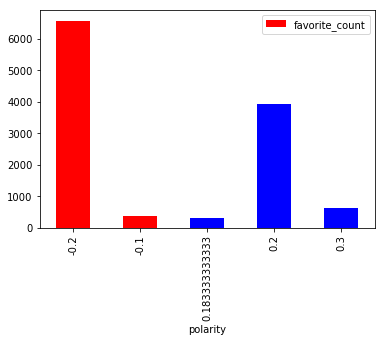

In [21]:
colors1 = 'rrbbb' 
favsort3.plot(kind='bar',color=colors1)
print('     Top Five Favorite_count tweets with their polarity')
plt.show()

In [32]:
favsortr = tweetframedf.sort_values(by='retweet_count', ascending=False)
favsortr

,created_at,favorite_count,retweet_count,text,polarity,Date
372,Fri Apr 14 23:59:45 +0000 2017,0,67209,jayversace DONALD TRUMP NOW WHY TF WOULD YOU ...,0.000000,2017-04-14
2243,Fri Apr 14 23:58:33 +0000 2017,0,67209,jayversace DONALD TRUMP NOW WHY TF WOULD YOU ...,0.000000,2017-04-14
4182,Fri Apr 14 23:57:15 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14
3983,Fri Apr 14 23:57:23 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14
4424,Fri Apr 14 23:57:04 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14
1834,Fri Apr 14 23:58:50 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14
203,Fri Apr 14 23:59:51 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14
781,Fri Apr 14 23:59:28 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14
5356,Fri Apr 14 23:56:24 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14
1432,Fri Apr 14 23:59:04 +0000 2017,0,66420,LittleDurant35 NASA s doing their best to fin...,0.545455,2017-04-14


In [58]:
favsort4 = favsortr[['retweet_count','polarity']]
favsort4 = favsort4.sort_values(by='retweet_count',ascending=False)
favsort4.set_index('polarity',inplace=True)
favsort4r= favsort4.head(50)


     Top Five retweet_count tweets with their polarity


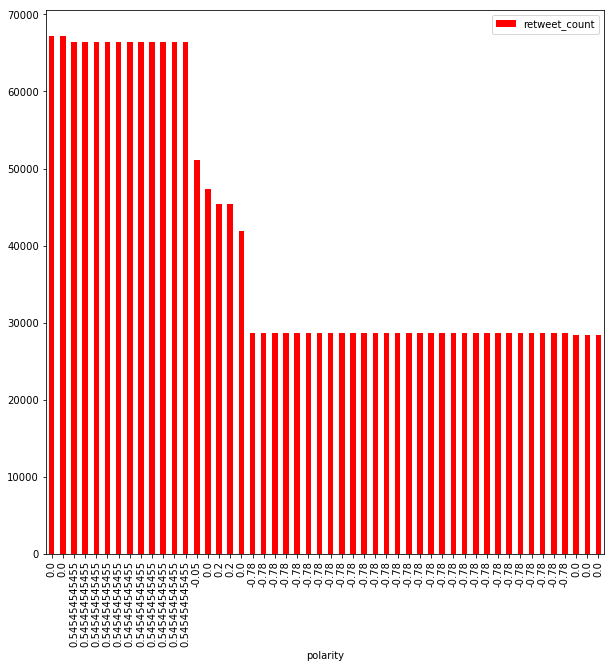

In [65]:
colors2 = 'r' 
favsort4r.plot(kind='bar',color=colors2,figsize=(10, 10))
print('     Top Five retweet_count tweets with their polarity')

plt.show()

In [24]:
favsort5 = favsort2[['retweet_count','favorite_count','polarity']]
favsort5.set_index('polarity',inplace=True)
favsort5

,retweet_count,favorite_count
polarity,,
-0.200000,2658,6570
-0.100000,438,369
0.183333,44,308
0.200000,2397,3939
0.300000,336,629


 Plotting for top 5 favorite_count and their retweet_count  with polarity as index


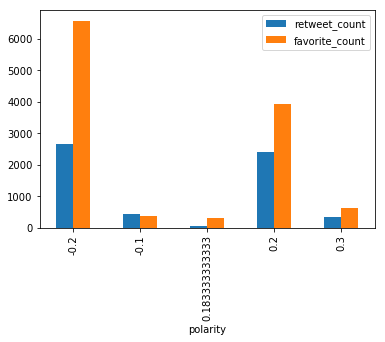

In [67]:
favsort5.plot(kind='bar')
print(' Plotting for top 5 favorite_count and their retweet_count  with polarity as index')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A39FEF4D30>]], dtype=object)

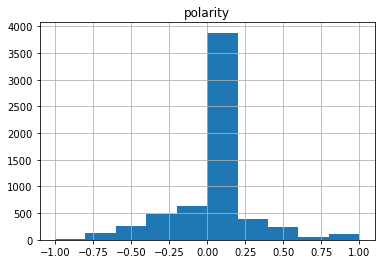

In [26]:
polar.hist()